<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/FIFA_World_Cup_2022_Teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset?resource=download

# 1. Загружаем данные в DataFrame

In [1]:
url = 'https://drive.google.com/file/d/10KHVeARJWdYTos8jPFshoKViv_n1m2sY/view?usp=sharing'

In [2]:
! gdown --id 10KHVeARJWdYTos8jPFshoKViv_n1m2sY

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10KHVeARJWdYTos8jPFshoKViv_n1m2sY
To: /content/Fifa_world_cup_matches.csv
100% 19.5k/19.5k [00:00<00:00, 21.1MB/s]


In [3]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 12.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik

In [5]:
df = pd.read_csv('/content/Fifa_world_cup_matches.csv')

In [6]:
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


# 2.Столбцы, которые буду использовать при анализе

**Перевод столбцов:**

1. team - команда
2. possession - владение мячом
3. number of goals - количество голов
4. total attempts - удары по воротам
5. conceded - пропущено
6. goal inside the penalty area - голы в штрафной площади
7. goal outside the penalty area - гол за пределами штрафной площади
8. assists - голевых передач
9. on target attempts - удары в створ
10. off target attempts - удары мимо ворот
11. attempts inside the penalty area - удары внутри штрафной
12. attempts outside the penalty area  team1 - удары за пределами штрафной
13. yellow cards - желтые карточки
14. red cards - красные карточки
15. fouls against - фолы против команды
16. offsides - офсайды
17. passes - количество передач
18. passes completed - количество успешных передач
19. crosses - количество навесов или длинных пасов с фланга в штрафную площадь
20. crosses completed - количество успешных навесов с фланга в штрафную площадь
21. corners - угловые
22. free kicks - штрафные удары
23. penalties scored - забитые пеальти
24. own goals - автоголы
25. forced turnovers - отборы мяча

# 3. Формируем таблицу, с которой будем работать

Анализировать буду результаты команд за весь ЧМ

In [7]:
df.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

In [8]:
col1 = ['team1','possession team1','number of goals team1',
       'total attempts team1', 'conceded team1', 'goal inside the penalty area team1',
       'goal outside the penalty area team1', 'assists team1',
       'on target attempts team1','off target attempts team1',
       'attempts inside the penalty area team1',
       'attempts outside the penalty area  team1', 'yellow cards team1', 'red cards team1',
       'fouls against team1', 'offsides team1', 'passes team1',
       'passes completed team1', 'crosses team1', 'crosses completed team1',
       'corners team1', 'free kicks team1', 'penalties scored team1','own goals team1',
       'forced turnovers team1']

In [9]:
col2 = ['team2','possession team2','number of goals team2',
       'total attempts team2', 'conceded team2', 'goal inside the penalty area team2',
       'goal outside the penalty area team2', 'assists team2',
       'on target attempts team2','off target attempts team2',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team2', 'yellow cards team2', 'red cards team2',
       'fouls against team2', 'offsides team2', 'passes team2',
       'passes completed team2', 'crosses team2', 'crosses completed team2',
       'corners team2', 'free kicks team2', 'penalties scored team2','own goals team2',
       'forced turnovers team2']

In [10]:
team1 = df[col1].copy()
team1.columns = ['team','possession team','number of goals team',
       'total attempts team', 'conceded team', 'goal inside the penalty area team',
       'goal outside the penalty area team', 'assists team',
       'on target attempts team','off target attempts team',
       'attempts inside the penalty area team',
       'attempts outside the penalty area  team', 'yellow cards team', 'red cards team',
       'fouls against team', 'offsides team', 'passes team',
       'passes completed team', 'crosses team', 'crosses completed team',
       'corners team', 'free kicks team', 'penalties scored team','own goals team',
       'forced turnovers team']

In [11]:
team2 = df[col2].copy()
team2.columns = ['team','possession team','number of goals team',
       'total attempts team', 'conceded team', 'goal inside the penalty area team',
       'goal outside the penalty area team', 'assists team',
       'on target attempts team','off target attempts team',
       'attempts inside the penalty area team',
       'attempts outside the penalty area  team', 'yellow cards team', 'red cards team',
       'fouls against team', 'offsides team', 'passes team',
       'passes completed team', 'crosses team', 'crosses completed team',
       'corners team', 'free kicks team', 'penalties scored team','own goals team',
       'forced turnovers team']

In [12]:
team1.head()

,team,possession team,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,...,offsides team,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team
0,QATAR,42%,0,5,2,0,0,0,0,5,...,3,450,381,9,4,1,19,0,0,52
1,ENGLAND,72%,6,13,2,6,0,6,7,3,...,2,809,730,23,7,8,16,0,0,63
2,SENEGAL,44%,0,14,2,0,0,0,3,8,...,2,383,313,19,7,6,14,0,0,63
3,UNITED STATES,51%,1,6,1,1,0,1,1,4,...,1,569,509,31,4,5,11,0,0,81
4,ARGENTINA,64%,1,14,2,1,0,0,6,5,...,10,610,529,29,12,9,22,1,0,65


In [13]:
team2.head()

,team,possession team,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,...,offsides team,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team
0,ECUADOR,50%,2,6,0,2,0,1,3,3,...,4,480,409,14,4,3,17,1,0,72
1,IRAN,19%,2,8,6,2,0,1,3,4,...,2,224,154,8,1,0,10,1,0,72
2,NETHERLANDS,45%,2,9,0,2,0,1,3,5,...,1,438,374,25,8,7,14,0,0,73
3,WALES,39%,1,7,1,1,0,0,3,3,...,1,409,321,15,6,3,15,1,0,72
4,SAUDI ARABIA,24%,2,3,1,2,0,1,2,0,...,1,267,190,9,2,2,16,0,0,80


In [14]:
teams = pd.concat([team1,team2], axis=0)

In [15]:
teams

,team,possession team,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,...,offsides team,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team
0,QATAR,42%,0,5,2,0,0,0,0,5,...,3,450,381,9,4,1,19,0,0,52
1,ENGLAND,72%,6,13,2,6,0,6,7,3,...,2,809,730,23,7,8,16,0,0,63
2,SENEGAL,44%,0,14,2,0,0,0,3,8,...,2,383,313,19,7,6,14,0,0,63
3,UNITED STATES,51%,1,6,1,1,0,1,1,4,...,1,569,509,31,4,5,11,0,0,81
4,ARGENTINA,64%,1,14,2,1,0,0,6,5,...,10,610,529,29,12,9,22,1,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,FRANCE,36%,2,9,1,1,1,2,5,3,...,2,369,310,13,6,2,11,0,0,54
60,CROATIA,54%,0,12,3,0,0,0,3,7,...,0,624,551,20,4,4,16,0,0,63
61,MOROCCO,55%,0,13,2,0,0,0,1,6,...,3,583,518,22,1,3,15,0,0,47
62,MOROCCO,45%,1,7,2,1,0,0,2,5,...,2,494,428,20,5,3,15,0,0,72


# 4. Анализ данных

In [16]:
teams

,team,possession team,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,...,offsides team,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team
0,QATAR,42%,0,5,2,0,0,0,0,5,...,3,450,381,9,4,1,19,0,0,52
1,ENGLAND,72%,6,13,2,6,0,6,7,3,...,2,809,730,23,7,8,16,0,0,63
2,SENEGAL,44%,0,14,2,0,0,0,3,8,...,2,383,313,19,7,6,14,0,0,63
3,UNITED STATES,51%,1,6,1,1,0,1,1,4,...,1,569,509,31,4,5,11,0,0,81
4,ARGENTINA,64%,1,14,2,1,0,0,6,5,...,10,610,529,29,12,9,22,1,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,FRANCE,36%,2,9,1,1,1,2,5,3,...,2,369,310,13,6,2,11,0,0,54
60,CROATIA,54%,0,12,3,0,0,0,3,7,...,0,624,551,20,4,4,16,0,0,63
61,MOROCCO,55%,0,13,2,0,0,0,1,6,...,3,583,518,22,1,3,15,0,0,47
62,MOROCCO,45%,1,7,2,1,0,0,2,5,...,2,494,428,20,5,3,15,0,0,72


In [17]:
teams.dtypes

team                                       object
possession team                            object
number of goals team                        int64
total attempts team                         int64
conceded team                               int64
goal inside the penalty area team           int64
goal outside the penalty area team          int64
assists team                                int64
on target attempts team                     int64
off target attempts team                    int64
attempts inside the penalty area team       int64
attempts outside the penalty area  team     int64
yellow cards team                           int64
red cards team                              int64
fouls against team                          int64
offsides team                               int64
passes team                                 int64
passes completed team                       int64
crosses team                                int64
crosses completed team                      int64


In [18]:
teams['possession team'] = teams['possession team'].apply(lambda x: int(x[0:-1]))

In [19]:
teams = teams.rename(columns={'possession team':'possession team in %'})

In [20]:
teams

,team,possession team in %,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,...,offsides team,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team
0,QATAR,42,0,5,2,0,0,0,0,5,...,3,450,381,9,4,1,19,0,0,52
1,ENGLAND,72,6,13,2,6,0,6,7,3,...,2,809,730,23,7,8,16,0,0,63
2,SENEGAL,44,0,14,2,0,0,0,3,8,...,2,383,313,19,7,6,14,0,0,63
3,UNITED STATES,51,1,6,1,1,0,1,1,4,...,1,569,509,31,4,5,11,0,0,81
4,ARGENTINA,64,1,14,2,1,0,0,6,5,...,10,610,529,29,12,9,22,1,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,FRANCE,36,2,9,1,1,1,2,5,3,...,2,369,310,13,6,2,11,0,0,54
60,CROATIA,54,0,12,3,0,0,0,3,7,...,0,624,551,20,4,4,16,0,0,63
61,MOROCCO,55,0,13,2,0,0,0,1,6,...,3,583,518,22,1,3,15,0,0,47
62,MOROCCO,45,1,7,2,1,0,0,2,5,...,2,494,428,20,5,3,15,0,0,72


In [21]:
teams.columns

Index(['team', 'possession team in %', 'number of goals team',
       'total attempts team', 'conceded team',
       'goal inside the penalty area team',
       'goal outside the penalty area team', 'assists team',
       'on target attempts team', 'off target attempts team',
       'attempts inside the penalty area team',
       'attempts outside the penalty area  team', 'yellow cards team',
       'red cards team', 'fouls against team', 'offsides team', 'passes team',
       'passes completed team', 'crosses team', 'crosses completed team',
       'corners team', 'free kicks team', 'penalties scored team',
       'own goals team', 'forced turnovers team'],
      dtype='object')

In [22]:
df = teams.groupby('team',as_index=False)[['possession team in %', 'number of goals team',
       'total attempts team', 'conceded team',
       'goal inside the penalty area team',
       'goal outside the penalty area team', 'assists team',
       'on target attempts team', 'off target attempts team',
       'attempts inside the penalty area team',
       'attempts outside the penalty area  team', 'yellow cards team',
       'red cards team', 'fouls against team', 'offsides team', 'passes team',
       'passes completed team', 'crosses team', 'crosses completed team',
       'corners team', 'free kicks team', 'penalties scored team',
       'own goals team', 'forced turnovers team']].agg('mean')

In [23]:
df

,team,possession team in %,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,...,offsides team,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team
0,ARGENTINA,51.142857,2.142857,14.857143,1.142857,2.000000,0.142857,1.142857,6.857143,6.000000,...,3.285714,625.000000,548.714286,16.428571,4.285714,5.571429,17.571429,0.571429,0.142857,70.571429
1,AUSTRALIA,31.250000,1.000000,6.250000,1.500000,0.750000,0.000000,0.750000,2.250000,2.500000,...,0.250000,384.000000,301.500000,14.500000,2.500000,2.000000,12.000000,0.000000,0.000000,76.750000
2,BELGIUM,49.666667,0.333333,11.333333,0.666667,0.333333,0.000000,0.333333,3.666667,6.333333,...,1.000000,593.000000,522.666667,17.000000,5.333333,5.666667,14.333333,0.000000,0.000000,60.000000
3,BRAZIL,50.400000,1.600000,18.000000,0.600000,1.600000,0.000000,1.200000,8.200000,6.800000,...,1.600000,601.800000,539.200000,23.200000,4.800000,7.400000,17.000000,0.200000,0.000000,72.200000
4,CAMEROON,38.333333,1.333333,9.000000,1.333333,1.333333,0.000000,1.333333,4.666667,2.666667,...,0.666667,386.333333,311.333333,17.333333,2.666667,4.000000,15.333333,0.000000,0.000000,80.000000
5,CANADA,47.000000,0.666667,11.666667,2.333333,0.333333,0.000000,0.333333,2.000000,6.333333,...,2.666667,499.333333,429.333333,18.000000,5.000000,4.000000,14.000000,0.000000,0.000000,61.666667
6,COSTA RICA,27.666667,1.000000,4.000000,3.666667,1.000000,0.000000,0.333333,2.333333,0.666667,...,4.333333,340.666667,270.000000,7.333333,1.000000,0.333333,15.000000,0.000000,0.000000,73.666667
7,CROATIA,48.000000,1.142857,11.571429,1.000000,1.000000,0.142857,1.142857,4.000000,5.142857,...,1.571429,610.285714,532.000000,23.285714,5.142857,4.285714,15.142857,0.000000,0.000000,78.285714
8,DENMARK,53.000000,0.333333,11.666667,1.000000,0.333333,0.000000,0.333333,3.000000,5.666667,...,1.666667,593.666667,521.000000,25.666667,6.333333,7.000000,9.333333,0.000000,0.000000,70.333333
9,ECUADOR,46.666667,1.333333,9.000000,1.000000,1.333333,0.000000,0.666667,4.000000,3.000000,...,2.666667,445.666667,369.000000,18.333333,4.666667,3.666667,15.666667,0.333333,0.000000,61.000000


Добавим столбец с количеством матчей на турнире для каждой команды

In [24]:
t = teams['team'].value_counts().reset_index().rename(columns={'team':'cnt_matches', 'index':'team'})

In [25]:
df = df.merge(t, how='left', on='team')

In [26]:
df = df.sort_values('cnt_matches',ascending=False)

In [27]:
df

,team,possession team in %,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,...,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team,cnt_matches
0,ARGENTINA,51.142857,2.142857,14.857143,1.142857,2.000000,0.142857,1.142857,6.857143,6.000000,...,625.000000,548.714286,16.428571,4.285714,5.571429,17.571429,0.571429,0.142857,70.571429,7
7,CROATIA,48.000000,1.142857,11.571429,1.000000,1.000000,0.142857,1.142857,4.000000,5.142857,...,610.285714,532.000000,23.285714,5.142857,4.285714,15.142857,0.000000,0.000000,78.285714,7
11,FRANCE,44.857143,2.285714,14.428571,1.142857,2.142857,0.142857,1.714286,5.000000,6.000000,...,522.285714,456.000000,20.857143,7.000000,5.428571,14.000000,0.285714,0.000000,74.857143,7
18,MOROCCO,34.857143,0.857143,8.714286,0.714286,0.714286,0.142857,0.571429,2.428571,4.000000,...,384.285714,317.000000,12.285714,2.714286,1.714286,14.571429,0.000000,0.142857,77.714286,7
3,BRAZIL,50.400000,1.600000,18.000000,0.600000,1.600000,0.000000,1.200000,8.200000,6.800000,...,601.800000,539.200000,23.200000,4.800000,7.400000,17.000000,0.200000,0.000000,72.200000,5
21,PORTUGAL,54.200000,2.400000,12.400000,1.200000,2.200000,0.200000,1.600000,5.000000,4.800000,...,595.400000,523.000000,20.400000,5.400000,5.600000,14.800000,0.400000,0.000000,60.600000,5
10,ENGLAND,57.800000,2.600000,12.000000,0.800000,2.400000,0.200000,2.200000,5.400000,4.200000,...,610.400000,544.600000,18.800000,6.000000,5.000000,14.800000,0.200000,0.000000,56.000000,5
19,NETHERLANDS,45.000000,2.000000,8.000000,0.800000,1.800000,0.200000,1.600000,3.200000,3.400000,...,560.800000,488.400000,15.800000,3.400000,3.800000,13.400000,0.000000,0.000000,82.400000,5
15,JAPAN,29.750000,1.250000,10.500000,1.000000,1.000000,0.250000,1.000000,3.250000,4.000000,...,398.250000,324.500000,16.750000,3.250000,4.750000,11.250000,0.000000,0.000000,79.750000,4
29,UNITED STATES,47.500000,0.750000,11.500000,1.000000,0.750000,0.000000,0.750000,3.750000,4.750000,...,508.250000,444.250000,24.000000,2.500000,5.500000,11.500000,0.000000,0.000000,73.250000,4


In [28]:
t = df.set_index('team')

In [29]:
t

,possession team in %,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,attempts inside the penalty area team,...,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team,cnt_matches
team,,,,,,,,,,,,,,,,,,,,,
ARGENTINA,51.142857,2.142857,14.857143,1.142857,2.000000,0.142857,1.142857,6.857143,6.000000,9.428571,...,625.000000,548.714286,16.428571,4.285714,5.571429,17.571429,0.571429,0.142857,70.571429,7
CROATIA,48.000000,1.142857,11.571429,1.000000,1.000000,0.142857,1.142857,4.000000,5.142857,6.714286,...,610.285714,532.000000,23.285714,5.142857,4.285714,15.142857,0.000000,0.000000,78.285714,7
FRANCE,44.857143,2.285714,14.428571,1.142857,2.142857,0.142857,1.714286,5.000000,6.000000,10.428571,...,522.285714,456.000000,20.857143,7.000000,5.428571,14.000000,0.285714,0.000000,74.857143,7
MOROCCO,34.857143,0.857143,8.714286,0.714286,0.714286,0.142857,0.571429,2.428571,4.000000,4.857143,...,384.285714,317.000000,12.285714,2.714286,1.714286,14.571429,0.000000,0.142857,77.714286,7
BRAZIL,50.400000,1.600000,18.000000,0.600000,1.600000,0.000000,1.200000,8.200000,6.800000,11.400000,...,601.800000,539.200000,23.200000,4.800000,7.400000,17.000000,0.200000,0.000000,72.200000,5
PORTUGAL,54.200000,2.400000,12.400000,1.200000,2.200000,0.200000,1.600000,5.000000,4.800000,6.400000,...,595.400000,523.000000,20.400000,5.400000,5.600000,14.800000,0.400000,0.000000,60.600000,5
ENGLAND,57.800000,2.600000,12.000000,0.800000,2.400000,0.200000,2.200000,5.400000,4.200000,8.400000,...,610.400000,544.600000,18.800000,6.000000,5.000000,14.800000,0.200000,0.000000,56.000000,5
NETHERLANDS,45.000000,2.000000,8.000000,0.800000,1.800000,0.200000,1.600000,3.200000,3.400000,5.000000,...,560.800000,488.400000,15.800000,3.400000,3.800000,13.400000,0.000000,0.000000,82.400000,5
JAPAN,29.750000,1.250000,10.500000,1.000000,1.000000,0.250000,1.000000,3.250000,4.000000,6.500000,...,398.250000,324.500000,16.750000,3.250000,4.750000,11.250000,0.000000,0.000000,79.750000,4


**Посмотрим на взаимосвязь переменных друг от друга** 

In [30]:
t_phik = t.phik_matrix()

interval columns not set, guessing: ['possession team in %', 'number of goals team', 'total attempts team', 'conceded team', 'goal inside the penalty area team', 'goal outside the penalty area team', 'assists team', 'on target attempts team', 'off target attempts team', 'attempts inside the penalty area team', 'attempts outside the penalty area  team', 'yellow cards team', 'red cards team', 'fouls against team', 'offsides team', 'passes team', 'passes completed team', 'crosses team', 'crosses completed team', 'corners team', 'free kicks team', 'penalties scored team', 'own goals team', 'forced turnovers team', 'cnt_matches']


Таблица, в которой отображены взаимосвязи статистических показателей по итогам всего турнира (линейные и нелинейные взаимосвязи):

In [31]:
t_phik

,possession team in %,number of goals team,total attempts team,conceded team,goal inside the penalty area team,goal outside the penalty area team,assists team,on target attempts team,off target attempts team,attempts inside the penalty area team,...,passes team,passes completed team,crosses team,crosses completed team,corners team,free kicks team,penalties scored team,own goals team,forced turnovers team,cnt_matches
possession team in %,1.000000,0.563937,0.000000,0.216248,0.489043,0.156335,0.828580,0.430504,0.119551,0.272383,...,0.847897,0.904299,0.000000,0.000000,0.671986,0.000000,0.575261,0.674170,0.000000,0.487415
number of goals team,0.563937,1.000000,0.000000,0.000000,0.811465,0.604909,0.825068,0.580859,0.000000,0.535571,...,0.751714,0.682293,0.304412,0.294951,0.000000,0.168478,0.554778,0.000000,0.000000,0.679803
total attempts team,0.000000,0.000000,1.000000,0.698721,0.515924,0.000000,0.000000,0.805533,0.926195,0.939874,...,0.000000,0.070682,0.759488,0.680443,0.785192,0.729105,0.349725,0.000000,0.000000,0.239684
conceded team,0.216248,0.000000,0.698721,1.000000,0.255555,0.000000,0.000000,0.000000,0.778453,0.111732,...,0.000000,0.000000,0.674534,0.578289,0.696992,0.334332,0.000000,0.000000,0.037663,0.000000
goal inside the penalty area team,0.489043,0.811465,0.515924,0.255555,1.000000,0.806096,0.505533,0.189986,0.000000,0.401301,...,0.538127,0.533663,0.000000,0.309410,0.000000,0.781906,0.355460,0.476390,0.312809,0.755825
goal outside the penalty area team,0.156335,0.604909,0.000000,0.000000,0.806096,1.000000,0.568256,0.425228,0.000000,0.000000,...,0.202292,0.000000,0.000000,0.000000,0.245275,0.507816,0.314660,0.515316,0.000000,0.815533
assists team,0.828580,0.825068,0.000000,0.000000,0.505533,0.568256,1.000000,0.266953,0.000000,0.337220,...,0.570388,0.475163,0.000000,0.745870,0.351881,0.415204,0.651322,0.412494,0.000000,0.705184
on target attempts team,0.430504,0.580859,0.805533,0.000000,0.189986,0.425228,0.266953,1.000000,0.102145,0.866831,...,0.000000,0.125286,0.444182,0.210139,0.592031,0.658824,0.651789,0.853235,0.000000,0.439129
off target attempts team,0.119551,0.000000,0.926195,0.778453,0.000000,0.000000,0.000000,0.102145,1.000000,0.842963,...,0.000000,0.000000,0.533477,0.686617,0.701442,0.513440,0.000000,0.000000,0.599909,0.000000
attempts inside the penalty area team,0.272383,0.535571,0.939874,0.111732,0.401301,0.000000,0.337220,0.866831,0.842963,1.000000,...,0.358364,0.379445,0.579703,0.418468,0.608854,0.704304,0.695639,0.907743,0.000000,0.000000


На графике представлена взаимосвязь послематчевых показателей друг с другом. Чем больше значение в ячейке (чем светлее ячейка), тем сильнее взаимосвязь между двумя показателями по методу Фика

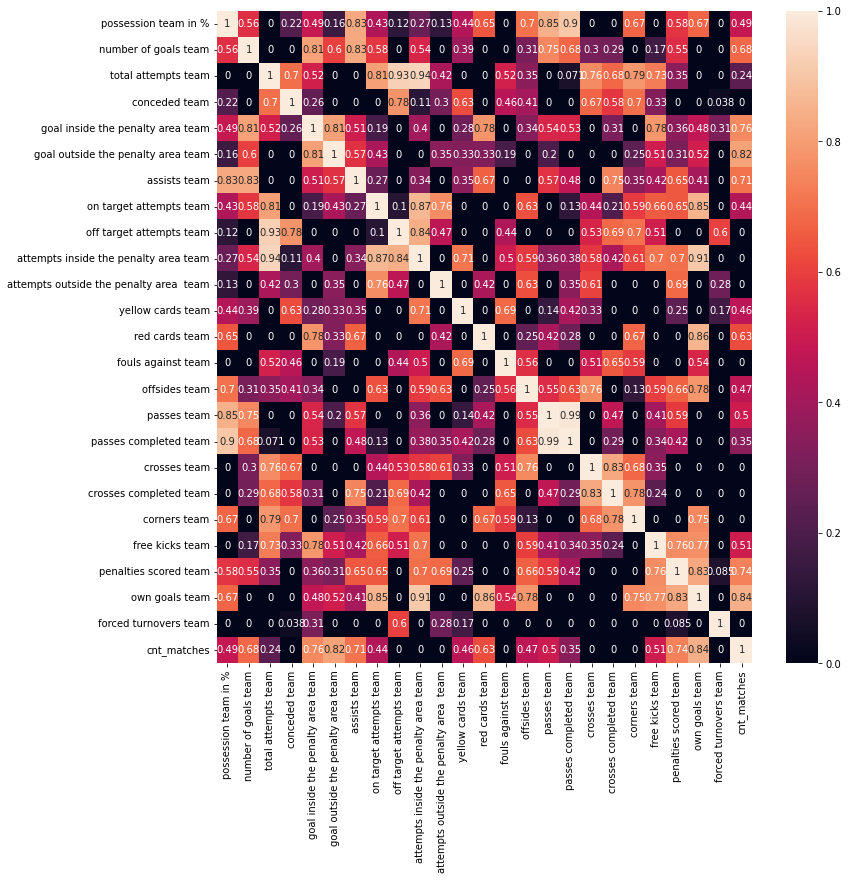

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(t_phik,annot= True)

**Посмотрю, как процент владения мячом взаимосвязан с другими матчевыми показателями**

In [33]:
t_phik['possession team in %'].sort_values(ascending=False).head(8)

possession team in %     1.000000
passes completed team    0.904299
passes team              0.847897
assists team             0.828580
offsides team            0.700172
own goals team           0.674170
corners team             0.671986
red cards team           0.647017
Name: possession team in %, dtype: float64



1.   Исходя из тепловой диаграммы видно,что процент владения мячом сильно взаимосвязан с количеством успешных передач и передач в целом. Что достаточно логично, чем больше игрок владеет мячом во время матча, тем более уверенно он себя с ним чувтсвует (больше игрового опыта в рамках матча), соответственно повышаетя шанс отдать более точную передачу.
2.   Исходя из тепловой диаграммы видно, что чем выше процент владения мячом, тем больше количество оффсайдов у каманд. Можно предположить, что команда, которая больше владеет мячом чаще идет вперед и игроки часто пересекают линию оффсайда во время атак.




**Проверим получившиеся результаты на сводных таблицах:**

In [34]:
df1 = (t[['possession team in %', 'passes completed team', 'passes team',
       'assists team', 'offsides team', 'own goals team', 'corners team',
       'red cards team']]
       .sort_values('possession team in %', ascending=False).copy())

In [35]:
pd.qcut(df1['possession team in %'], 5).value_counts()

(27.666, 36.867]    7
(36.867, 41.0]      7
(50.253, 69.0]      7
(46.0, 50.253]      6
(41.0, 46.0]        5
Name: possession team in %, dtype: int64

In [36]:
df1['possession_groups'] = pd.qcut(df1['possession team in %'], 5)

In [37]:
df1.groupby('possession_groups')[['passes completed team', 'passes team',
       'assists team', 'offsides team', 'own goals team', 'corners team',
       'red cards team']].agg('mean')

,passes completed team,passes team,assists team,offsides team,own goals team,corners team,red cards team
possession_groups,,,,,,,
"(27.666, 36.867]",290.559524,366.028912,0.605442,1.828231,0.020408,2.411565,0.020408
"(36.867, 41.0]",336.523810,412.095238,0.595238,1.571429,0.000000,4.071429,0.095238
"(41.0, 46.0]",427.480000,497.717143,1.279524,1.653810,0.000000,4.645714,0.040000
"(46.0, 50.253]",440.930556,512.367063,0.593254,2.248016,0.000000,4.742063,0.000000
"(50.253, 69.0]",588.561565,659.145238,1.377551,2.414626,0.020408,6.307823,0.000000


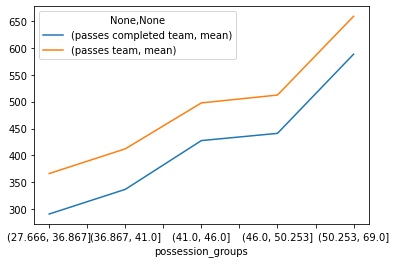

In [38]:
(df1.groupby('possession_groups')[['passes completed team', 'passes team']]
.agg(['mean'])).plot()

Исходя из сводной таблицы видно, что с увеличением процента владения мячом, команда отдает большее количество передач.

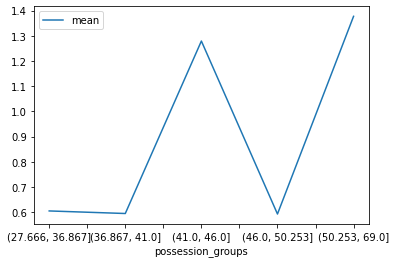

In [39]:
(df1.groupby('possession_groups')['assists team']
.agg(['mean'])).plot()

Если брать в расчет все команды турнира, то владение мячом не оказывает прямого влияния на число голевых передач команды.

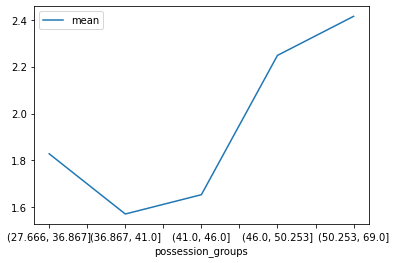

In [40]:
(df1.groupby('possession_groups')['offsides team']
.agg(['mean'])).plot()

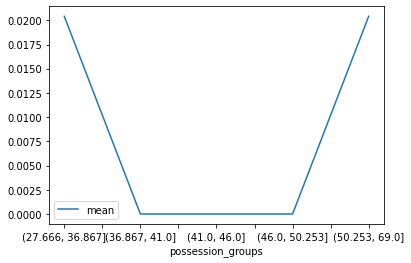

In [41]:
(df1.groupby('possession_groups')['own goals team']
.agg(['mean'])).plot()

Если брать в расчет все команды турнира, то владение мячом не оказывает прямого влияния на число голевых передач команды.

Предположим:      
Исходя из графика выше можно сделать предположение,что команды с низким владением мячом хуже играют в обороне, и из-за этого повышается шанс забить в свои ворота. 

In [42]:
df1[df1['possession team in %'] <= 36.867]

,possession team in %,passes completed team,passes team,assists team,offsides team,own goals team,corners team,red cards team,possession_groups
team,,,,,,,,,
SAUDI ARABIA,36.666667,293.666667,374.666667,0.666667,1.000000,0.000000,2.666667,0.000000,"(27.666, 36.867]"
MOROCCO,34.857143,317.000000,384.285714,0.571429,2.714286,0.142857,1.714286,0.142857,"(27.666, 36.867]"
POLAND,31.750000,282.250000,353.000000,0.250000,0.250000,0.000000,2.750000,0.000000,"(27.666, 36.867]"
IRAN,31.333333,245.000000,327.333333,0.666667,2.000000,0.000000,2.666667,0.000000,"(27.666, 36.867]"
AUSTRALIA,31.250000,301.500000,384.000000,0.750000,0.250000,0.000000,2.000000,0.000000,"(27.666, 36.867]"
JAPAN,29.750000,324.500000,398.250000,1.000000,2.250000,0.000000,4.750000,0.000000,"(27.666, 36.867]"
COSTA RICA,27.666667,270.000000,340.666667,0.333333,4.333333,0.000000,0.333333,0.000000,"(27.666, 36.867]"


Опровергаем утверждение выше, т.к. из 7 команд с % владения мячом ниже чем 36.867 % только одна забивала в свои ворота (Марокко).

Предположим:      
Исходя из графика выше можно сделать предположение,что команды с высоким владением мячом хуже играют в обороне, и из-за этого повышается шанс забить в свои ворота. 

In [43]:
df1[df1['possession team in %'] > 50.253]

,possession team in %,passes completed team,passes team,assists team,offsides team,own goals team,corners team,red cards team,possession_groups
team,,,,,,,,,
SPAIN,69.000000,881.750000,954.750000,1.500000,2.750000,0.000000,5.250000,0.0,"(50.253, 69.0]"
ENGLAND,57.800000,544.600000,610.400000,2.200000,1.000000,0.000000,5.000000,0.0,"(50.253, 69.0]"
PORTUGAL,54.200000,523.000000,595.400000,1.600000,2.600000,0.000000,5.600000,0.0,"(50.253, 69.0]"
DENMARK,53.000000,521.000000,593.666667,0.333333,1.666667,0.000000,7.000000,0.0,"(50.253, 69.0]"
GERMANY,52.666667,561.666667,633.000000,1.666667,4.000000,0.000000,8.333333,0.0,"(50.253, 69.0]"
ARGENTINA,51.142857,548.714286,625.000000,1.142857,3.285714,0.142857,5.571429,0.0,"(50.253, 69.0]"
BRAZIL,50.400000,539.200000,601.800000,1.200000,1.600000,0.000000,7.400000,0.0,"(50.253, 69.0]"


Опровергаем утверждение выше, т.к. из 7 команд с % владения мячом выше чем 50.253 % только одна забивала в свои ворота (ARGENTINA).

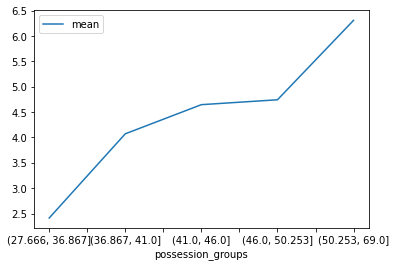

In [44]:
(df1.groupby('possession_groups')['corners team']
.agg(['mean'])).plot()

Исходя из сводной таблицы видно, что с увеличением процента владения мячом, команда зарабатывает больше угловых.

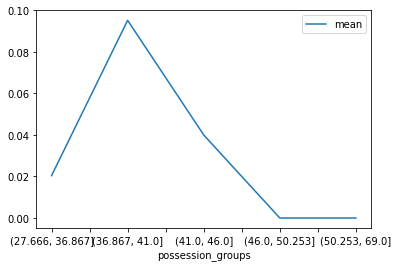

In [45]:
(df1.groupby('possession_groups')['red cards team']
.agg(['mean'])).plot()

Исходя из графика выше: Низкий процент владения мячом заставляет команду больше фолить и соответственно увеличивается число красных карточек.

In [46]:
t.to_excel('Teams Statistics.xls')

<ipython-input-46-bf39bb61ef44>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  t.to_excel('Teams Statistics.xls')
